In [1]:
from Bio import SeqIO
import pandas as pd
import numpy as np
from tqdm import tqdm
from Bio import pairwise2
from dataset import Dataset
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(context="paper", style="white", palette="deep")

def local_align_score(seq1, seq2):
    alignments = pairwise2.align.localms(
        seq1, seq2,
        2,    # match
        -1,   # mismatch
        -5,   # gap open
        -0.5  # gap extend
    )
    return alignments[0].score if alignments else 0

def normalized_similarity(seq1, seq2):
    raw = local_align_score(seq1, seq2)
    return raw / min(len(seq1), len(seq2))

def match_sequences(ds_id, ds_seq, seqs_silkome, top_k=5):
    matches = {}

    scores = []

    for silk_id, silk_seq in tqdm(seqs_silkome.items(), desc=f'Aligning {ds_id}'):
        sim = normalized_similarity(ds_seq, silk_seq)
        #print("Similarity score: ", sim)
        scores.append((silk_id, sim))

    # Sort by similarity (descending)
    scores.sort(key=lambda x: x[1], reverse=True)

    # Keep top-k
    matches[ds_id] = scores[:top_k]
        
    return matches

def matches_to_dataframe(matches):
    rows = []

    for ds_id, hits in matches.items():
        for rank, (silk_id, score) in enumerate(hits, start=1):
            rows.append({
                "ds_id": ds_id,
                "rank": rank,
                "silkome_id": silk_id,
                "similarity": score
            })

    return pd.DataFrame(rows)


seq_nt = 'MGHHHHHHSHTTPWTNPGLAENFMNSFMQGLSSMPGFTASQLDDMSTIAQSMVQSIQSLAAQGRTSPNKLQALNMAFASSMAEIAASEEGGGSLSTKTSSIASAMSNAFLQTTGVVNQPFINEITQLVSMFAQAGMNDVSA'
seq_ct = 'VTSGGYGYGTSAAAGAGVAAGSYAGAVNRLSSAEAASRVSSNIAAIASGGASALPSVISNIYSGVVASGVSSNEALIQALLELLSALVHVLSSASIGNVSSVGVDSTLNVVQDSVGQYVG'
seqs_ds = {}
seqs_ds['NT2RepCT'] = 'MGHHHHHHMSHTTPWTNPGLAENFMNSFMQGLSSMPGFTASQLDDMSTIAQSMVQSIQSLAAQGRTSPNKLQALNMAFASSMAEIAASEEGGGSLSTKTSSIASAMSNAFLQTTGVVNQPFINEITQLVSMFAQAGMNDVSAGNSGRGQGGYGQGSGGNAAAAAAAAAAAAAAAGQGGQGGYGRQSQGAGSAAAAAAAAAAAAAAGSGQGGYGGQGQGGYGQSGSVTSGGYGYGTSAAAGAGVAAGSYAGAVNRLSSAEAASRVSSNIAAIASGGASALPSVISNIYSGVVASGVSSNEALIQALLELLSALVHVLSSASIGNVSSVGVDSTLNVVQDSVGQYVG'
seqs_ds['A3IA'] = 'MGHHHHHHMSHTTPWTNPGLAENFMNSFMQGLSSMPGFTASQLDDMSTIAQSMVQSIQSLAAQGRTSPNKLQALNMAFASSMAEIAASEEGGGSLSTKTSSIASAMSNAFLQTTGVVNQPFINEITQLVSMFAQAGMNDVSAGNSGRGQGGYGQGSGGNAAAIAAAIAAIAAAAGQGGQGGYGRQSQGAGSAAAAAAAAAAAAAAGSGQGGYGGQGQGGYGQSGSVTSGGYGYGTSAAAGAGVAAGSYAGAVNRLSSAEAASRVSSNIAAIASGGASALPSVISNIYSGVVASGVSSNEALIQALLELLSALVHVLSSASIGNVSSVGVDSTLNVVQDSVGQYVG'
seqs_ds['Rep1'] = seq_nt + 'GNSGPGPQGPSGPGPQGPYGPGPQGPGPQGPAPQGPSGPGPQRPQGPGPQRPYGPGGISVVSTTVSGPGPQGPSAPGPQGPYGPGPQVPGPQGPGPQGPSGPGPQRPQGPGPQGPYGPGGVSVVSQTVSGPGPQGPSGPGPQGPYGPGPQGPGPQGPGPQGPSGAGPQRPQGPGPQGPSGS' + seq_ct
seqs_ds['Rep2'] = seq_nt + 'GNSGRPSSSYGAPGGGNGGRPSDTYGAPGGGNGGRPSDTYGAPGGGGNGNGGRPSSSYGAPGQGQGNGNGGRPSSSYGAPGGGNGGRPSDTYGAPGGGNGGRPSDTYGAPGGGNNGGRPSSSYGAPGGGNGGRPSDTYGAPGGGNSGS' + seq_ct
seqs_ds['Rep3'] = seq_nt + 'GNSGGAGVPGVPGAIPGIGGIAGVGTPAAAAAAAAAAKAAKYGAAAGLVPGGPGFGPGVVGVPGAGVPGVGVPGAGIPVVPGAGIPGAAVPGVVSPEAAAKAAAKAAKYGARPGVGVGGSGS' + seq_ct
seqs_ds['Rep5'] = seq_nt + 'GNSGRGQGGYGQGSGGNAAAAAAAAAAAAAAAGAGAAGVLPGVGGAGVPGVPGAIPGIGGIAGVGTPAAAAAAAAAAAAAAGAGAAGVLPGVGGAGVPGVPGAIPGIGGIAGVGTPSVTSGGYGYGTSAAAGAGVAAGSYAGAVNRLSSAEAASGS' + seq_ct
seqs_ds['Rep7'] = seq_nt + 'GNSSSSTTTTTSAARSQAASQSASSSYSSAFAQAASSSFATSSALSRAFSSVSSASAASSLAYSIGLSAARSLGIADAAGLAGALARAVGALGQGATAASYGNALSTAAGQFFATAGLLNAGNASALASSFARAFSASAESQSFAQSQAFQQASAFQQAASRSASQSAAEADSTSSSGS' + seq_ct
seqs_ds['4A 2rep'] = seq_nt + 'GRGQGGYGQGSGGNAAAAGQGGQGGYGRQSQGAGSAAAAGSGQGGYGGQGQGGYGQ' + seq_ct
seqs_ds['VN-A3IA'] = 'MGHHHHHHMENLYFQGGPNSPQVTRGDVFTMPHMSHTTPWTNPGLAENFMNSFMQGLSSMPGFTASQLDDMSTIAQSMVQSIQSLAAQGRTSPNKLQALNMAFASSMAEIAASEEGGGSLSTKTSSIASAMSNAFLQTTGVVNQPFINEITQLVSMFAQAGMNDVSAGNSGRGQGGYGQGSGGNAAAIAAAIAAAIAAAGQGGQGGYGRQSQGAGSAAAAAAAAAAAAAAGSGQGGYGGQGQGGYGQSGSVTSGGYGYGTSAAAGAGVAAGSYAGAVNRLSSAEAASRVSSNIAAIASGGASALPSVISNIYSGVVASGVSSNEALIQALLELLSALVHVLSSASIGNVSSVGVDSTLNVVQDSVGQYVG'
seqs_ds['fNT A3IA'] = 'MGHHHHHHMGGSTPWDSPSMAESFMRSFINGISSSGAFSGDQIGDMQDITGTMQASVEKMASTGRSSKSKLQAMNMAFASSMAEIAAAEAGGASMDSKTNAITDALRGAFLQTTGVSNEQFITEIRGLVSLIASNVNAGNSGRGQGGYGQGSGGNAAAIAAAIAAAIAAAGQGGQGGYGRQSQGAGSAAAAAAAAAAAAAAGSGQGGYGGQGQGGYGQSGSVTSGGYGYGTSAAAGAGVAAGSYAGAVNRLSSAEAASRVSSNIAAIASGGASALPSVISNIYSGVVASGVSSNEALIQALLELLSALVHVLSSASIGNVSSVGVDSTLNVVQDSVGQYVG'
seqs_ds['Br_MaSp2_300'] = seq_nt + 'GGPGASAAVAVSSGPGGYGPGSPGPSGPSGPGGYGPGSQGGPSGPGGYGPGSQGPNGPGGPGSSAAVAVSSGPGGYGPGSQGGPSGPGSQGPSGPGGPGSSSAASGPGGYGPGSQGPSGPSGPGGYGPGSQGGPSGPGGYGPGSQGPNGPGGPGASAAVAVSSGPGGYGPGSQGPSGPSGPGGYGPGSQGGPSGPGGYGPGSQGPNGPGGPGASAAVAVSSGPGGYGPGSQGPSGPSGPGGYGPGSQGGPSGPGGYGPGSQGPNGPGGPGSSAAVAVSSGPGGYGPGSQGGPSGPGSQGPSG' + seq_ct
seqs_ds['Br_MaSp2_400'] = seq_nt + 'GGPGASAAVAVSSGPGGYGPGSPGPSGPSGPGGYGPGSQGGPSGPGGYGPGSQGPNGPGGPGSSAAVAVSSGPGGYGPGSQGGPSGPGSQGPSGPGGPGSSSAASGPGGYGPGSQGPSGPSGPGGYGPGSQGGPSGPGGYGPGSQGPNGPGGPGASAAVAVSSGPGGYGPGSQGPSGPSGPGGYGPGSQGGPSGPGGYGPGSQGPNGPGGPGASAAVAVSSGPGGYGPGSQGPSGPSGPGGYGPGSQGGPSGPGGYGPGSQGPNGPGGPGSSAAVAVSSGPGGYGPGSQGGPSGPGSQGPSGPGGPGSSSAASGPGGYGPGSQGPSGPSGPGGYGPGSQGGPSGPGGYGPGSQGPNGPGGPGASAAVAVSSGPGGYGPGSQGPSGPSGPGGYGPGSQGGPS' + seq_ct
seqs_ds['Br_MaSp2_long'] = seq_nt + 'GGPGASAAVAVSSGPGGYGPGSPGPSGPSGPGGYGPGSQGGPSGPGGYGPGSQGPNGPGGPGSSAAVAVSSGPGGYGPGSQGGPSGPGSQGPSGPGGPGSSSAASGPGGYGPGSQGPSGPSGPGGYGPGSQGGPSGPGGYGPGSQGPNGPGGPGASAAVAVSSGPGGYGPGSQGPSGPSGPGGYGPGSQGGPSGPGGYGPGSQGPNGPGGPGASAAVAVSSGPGGYGPGSQGP' + seq_ct
seqs_ds['Br_MaSp2_short'] = seq_nt + 'SAASGPGGYGPGSQGPSGPSGPGGYGPGSQGGPSGPGGYGPGSQGPNGPGGPGASAAVAVSSGPGGYGPGSQGPSGPSGPGGYGPGSQGGPSGPGGYGPGSQGPNGPGGPGASAAVAVSSGPGGYGPGSQ' + seq_ct

fasta_path = "../data/spider-silkome-database.v1.prot.fasta"
mech_props = pd.read_csv('../data/idv_mech_prop_sequence 2.csv')
k = 100

/usr/lib/python3.14/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [ ]:
seqs_silkome = {}

for record in SeqIO.parse(fasta_path, "fasta"):
    seq_id = record.id          # e.g. "SeqID_123"
    sequence = str(record.seq)  # amino acid sequence
    seqs_silkome[seq_id] = sequence

print(f"Loaded {len(seqs_silkome)} sequences")# Store sequences by ID

for ds_id, ds_seq in seqs_ds.items():
    matches = match_sequences(ds_id, ds_seq, seqs_silkome, top_k=k)
    df_matches = matches_to_dataframe(matches)
    df_matches.to_csv(f"../data/sequence_matches/top_{k}_sequence_matches_{ds_id}.csv", index=False)

In [2]:
valid_ids = set(mech_props.loc[:, 'idv_id'])

for prot in seqs_ds.keys():
    df = pd.read_csv(f"../data/sequence_matches/top_{k}_sequence_matches_{prot}.csv")
    df_reduced = pd.DataFrame(columns=df.columns)
    i = 0
    for index, row in df.iterrows():
        idv_id = int(row.loc['silkome_id'].split('|')[1])
        if idv_id in valid_ids:
            df_reduced.loc[i] = row
            i += 1
    df_reduced.to_csv(f"../data/sequence_matches_reduced/sequence_matches_{prot}.csv", index=False)

In [2]:
recombinant_proteins = ['NT2RepCT', 'A3IA', 'Rep1', 'Rep2', 'Rep3', 
                        'Rep5', 'Rep7', '4A 2rep', 'VN-A3IA', 'fNT A3IA', 
                        'Br_MaSp2_300', 'Br_MaSp2_400', 'Br_MaSp2_long', 'Br_MaSp2_short']
property_labels = ['Strength (MPa)', 'Strain (mm/mm)', 'Toughness Modulus (MJ m-3)', 'Diameter (µm)', 'Youngs Modulus (GPa)']
ds_props = Dataset(scaler='none').df.loc[:, ['Protein'] + property_labels]
ds_props = ds_props.loc[ds_props.loc[:, 'Protein'].isin(recombinant_proteins)]

ds_means = pd.DataFrame(index=recombinant_proteins, columns=property_labels)
ds_sds = pd.DataFrame(index=recombinant_proteins, columns=property_labels)
i = 0
for protein in recombinant_proteins:
    props = ds_props.loc[ds_props.loc[:, 'Protein'] == protein].iloc[:, 1:]
    ds_means.loc[protein] = props.mean().to_numpy()
    ds_sds.loc[protein] = props.std(ddof=1).to_numpy()

silkome_means =  pd.DataFrame(columns=['Protein', 'idv_id', 'Similarity'] + property_labels)
silkome_sds =  pd.DataFrame(columns=['Protein', 'idv_id', 'Similarity'] + property_labels)
threshold = .8
i = 0
for prot in recombinant_proteins:
    prot_df = pd.read_csv(f"../data/sequence_matches_reduced/sequence_matches_{prot}.csv")
    prot_df = prot_df.loc[prot_df.loc[:, 'similarity'] >= threshold]
    silkome_ids = set()
    for index, row in prot_df.iterrows():
        silkome_id = int(row['silkome_id'].split('|')[1])
        if silkome_id not in silkome_ids:
            silkome_ids.add(silkome_id)
            silkome_props = mech_props.loc[mech_props.loc[:, 'idv_id'] == silkome_id]
            silkome_means.loc[i] = prot, silkome_id, row['similarity'], silkome_props['tensile_strength'].to_numpy()[0], silkome_props['strain_at_break'].to_numpy()[0], silkome_props['toughness'].to_numpy()[0], silkome_props['diameter'].to_numpy()[0], silkome_props["young's_modulus"].to_numpy()[0]
            silkome_sds.loc[i] = prot, silkome_id, row['similarity'], silkome_props['tensile_strength_sd'].to_numpy()[0], silkome_props['strain_at_break_sd'].to_numpy()[0], silkome_props['toughness_sd'].to_numpy()[0], silkome_props['diameter_sd'].to_numpy()[0], silkome_props["young's_modulus_sd"].to_numpy()[0]
            i += 1

for df in silkome_means, silkome_sds:
    df.loc[:, 'Strength (MPa)'] *= 1000
    df.loc[:, 'Toughness Modulus (MJ m-3)'] *= 1000
    df.loc[:, 'Strain (mm/mm)'] /= 100


/home/erik/Repositories/Spinning-condition-and-mechanical-properties/src/dataset.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1.0, 1.0, 1.0, 1.0, 1.0, ..., 1.0, 1.0, 1.0, 1.0, 1.0]
Length: 2190
Categories (2, float64): [1.0, 2.0]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  self._df.loc[:, self.categorical_columns] = self._df.loc[:, self.categorical_columns].astype('category')


In [9]:
print(ds_means.to_string())

               Strength (MPa) Strain (mm/mm) Toughness Modulus (MJ m-3) Diameter (µm) Youngs Modulus (GPa)
NT2RepCT            83.718132       0.969571                  63.984878     13.094696             2.421763
A3IA                102.99791       1.116015                  85.469821     20.572371             2.312306
Rep1               120.359984       0.794736                  76.691147     11.272333             2.926667
Rep2               110.409636       0.446974                  42.224505     11.190667             2.983333
Rep3                92.101655       0.489031                  41.564038     14.935942             2.473913
Rep5                81.454316       0.326868                  24.498239     16.265667                2.345
Rep7                90.055417        0.15799                  10.952954     15.457797             2.777966
4A 2rep             79.760917       0.045756                   2.206458     16.958271             2.517254
VN-A3IA            143.252195       0

In [10]:
print(silkome_means.to_string())

           Protein  idv_id  Similarity  Strength (MPa)  Strain (mm/mm)  Toughness Modulus (MJ m-3)  Diameter (µm)  Youngs Modulus (GPa)
0         NT2RepCT    5023    0.909091          1130.0           0.185                        80.0           0.65                  3.53
1         NT2RepCT    4542    0.887417           600.0           0.119                        40.0           1.28                  5.63
2         NT2RepCT    5477    0.817708          1370.0           0.187                       129.0           0.35                  7.08
3         NT2RepCT    5567    0.808642             NaN             NaN                         NaN           0.71                   NaN
4             A3IA    5023    0.893365          1130.0           0.185                        80.0           0.65                  3.53
5             A3IA    4542    0.887417           600.0           0.119                        40.0           1.28                  5.63
6             A3IA    5477    0.817708          

In [22]:
print(len(ds_props.loc[:, 'Protein'].unique()))

14


In [11]:
print(ds_props.loc[:, 'Protein'].value_counts())

Protein
A3IA              1153
NT2RepCT           448
Rep3                69
Rep1                60
Rep5                60
Rep2                60
Rep7                59
4A 2rep             59
VN-A3IA             30
fNT A3IA            22
Br_MaSp2_short      10
Br_MaSp2_400        10
Br_MaSp2_long       10
Br_MaSp2_300        10
Name: count, dtype: int64


In [ ]:
print(silkome_means.loc[:, 'Protein'].value_counts())

Protein
Br_MaSp2_300      14
Br_MaSp2_400      14
Br_MaSp2_long      7
Rep1               4
NT2RepCT           4
A3IA               4
Rep5               4
VN-A3IA            4
Rep3               3
Rep2               3
Rep7               3
4A 2rep            3
Br_MaSp2_short     3
fNT A3IA           1
Name: count, dtype: int64


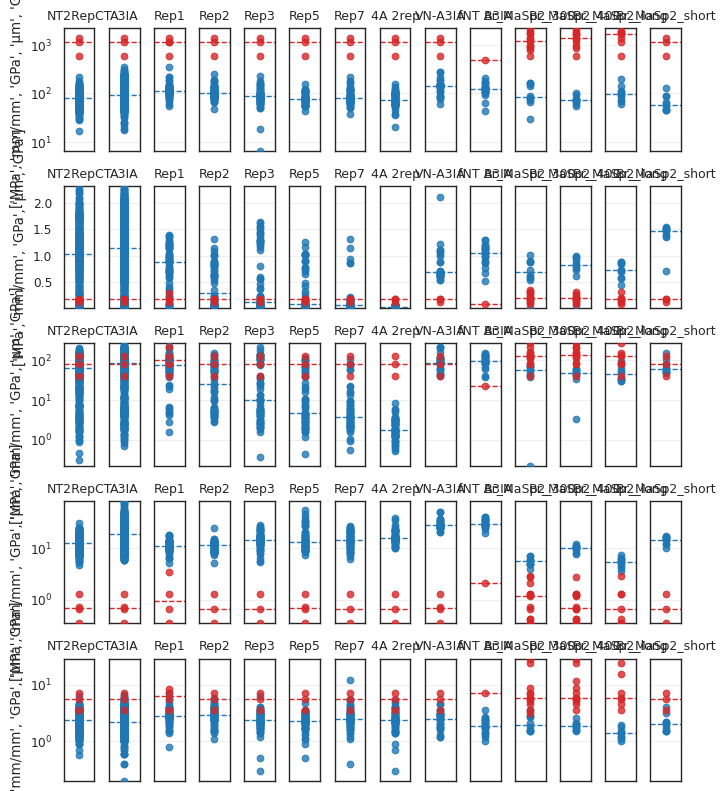

In [ ]:
import matplotlib.gridspec as gridspec
from collections import defaultdict

def plot_protein_comparison_grid(
    properties,
    ds_props,
    silkome_means,
    unit,
    log_scale_props=defaultdict(lambda: False),
    figsize=(7, 7),
    silkome_sds=None,
):

    fig = plt.figure(figsize=figsize)
    gs = gridspec.GridSpec(5, 14, figure=fig)

    axes = np.empty((5, 14), dtype=object)
    for r in range(5):
        for c in range(14):
            axes[r, c] = fig.add_subplot(gs[r, c])

    for i, prop in enumerate(properties):
        # ---------- Global y-limits ----------
        all_art = ds_props[prop].dropna().values
        all_nat = silkome_means[prop].dropna().values
            
        ymin = min(all_art.min(), all_nat.min())
        ymax = max(all_art.max(), all_nat.max())

        if log_scale_props[prop]:
            ymin = max(ymin, 1e-6)  # avoid log(0)

        for j, ax in enumerate(axes[i]):

            if j >= len(recombinant_proteins):
                ax.axis("off")

            protein = recombinant_proteins[j]

            art_sub = ds_props[ds_props["Protein"] == protein]
            nat_sub = silkome_means[silkome_means["Protein"] == protein]

            art_vals = art_sub[prop].dropna().values
            nat_vals = nat_sub[prop].dropna().values

            # ---------- Artificial silk ----------
            ax.scatter(
                np.zeros_like(art_vals),
                art_vals,
                color="tab:blue",
                zorder=3,
                alpha=0.8
            )

            ax.axhline(
                np.median(art_vals),
                color="tab:blue",
                linestyle="--",
                lw=1
            )

            # ---------- Natural silk ----------
            ax.scatter(
                np.zeros_like(nat_vals),
                nat_vals,
                color="tab:red",
                zorder=3,
                alpha=0.8
            )

            ax.axhline(
                np.median(nat_vals),
                color="tab:red",
                linestyle="--",
                lw=1
            )

            if silkome_sds is not None:
                nat_sub_sd = silkome_sds[silkome_sds["Protein"] == protein]
                nat_sd = nat_sub_sd[prop].dropna().values
                ax.errorbar(
                    np.zeros_like(nat_vals),
                    nat_vals,
                    xerr=nat_sd,
                    fmt="none",
                    ecolor="tab:red",
                    alpha=0.5
                )

            # ---------- Formatting ----------
            ax.set_ylim(ymin, ymax)
            ax.set_xticks([])
            ax.grid(axis="y", alpha=0.3)
            if j == 0:
                ax.set_title(protein, fontsize=9)

            if log_scale_props[prop]:
                ax.set_yscale("log")

            if j == 0:
                ax.set_ylabel(unit)
            else:
                ax.set_yticklabels([])

    # ---------- Legend axis spanning last two cells ----------
    legend_ax = fig.add_subplot(gs[3, 2:4])  # row 3, columns 2–3
    legend_ax.axis("off")

    '''
    # ---------- Figure-level legend ----------
    from matplotlib.lines import Line2D

    legend_elements = [
        Line2D([0], [0], color="tab:blue", lw=1.5, linestyle="--",
            label="Artificial silk (median)"),
        Line2D([0], [0], color="tab:red", lw=1.5, linestyle="--",
            label="Natural silk (median)"),
        Line2D([0], [0], marker="o", color="tab:red", lw=0,
            markersize=6,
            label="Natural silk (individual spiders)")
    ]

    legend_ax.legend(
        handles=legend_elements,
        loc="center",
        frameon=False,
        fontsize=10,
        handlelength=2.5,
        ncol=1   # or 2 if you want it more compact
    )'''

    # ---------- Title ----------
    #title = prop_label if prop_label is not None else property
    #fig.suptitle(
    #    f"Artificial vs Natural Spider Silk – {title}",
    #    fontsize=14
    #)

    #fig.tight_layout(rect=(0, 0, 0.97, 0.93))
    fig.tight_layout()

    return fig


units = ['MPa', 'mm/mm', 'GPa', 'μm', 'GPa']
log_scale_props = defaultdict(lambda: True) 
log_scale_props[property_labels[1]] = False
fig = plot_protein_comparison_grid(property_labels, ds_props, silkome_means, units, log_scale_props, figsize=(7,8))

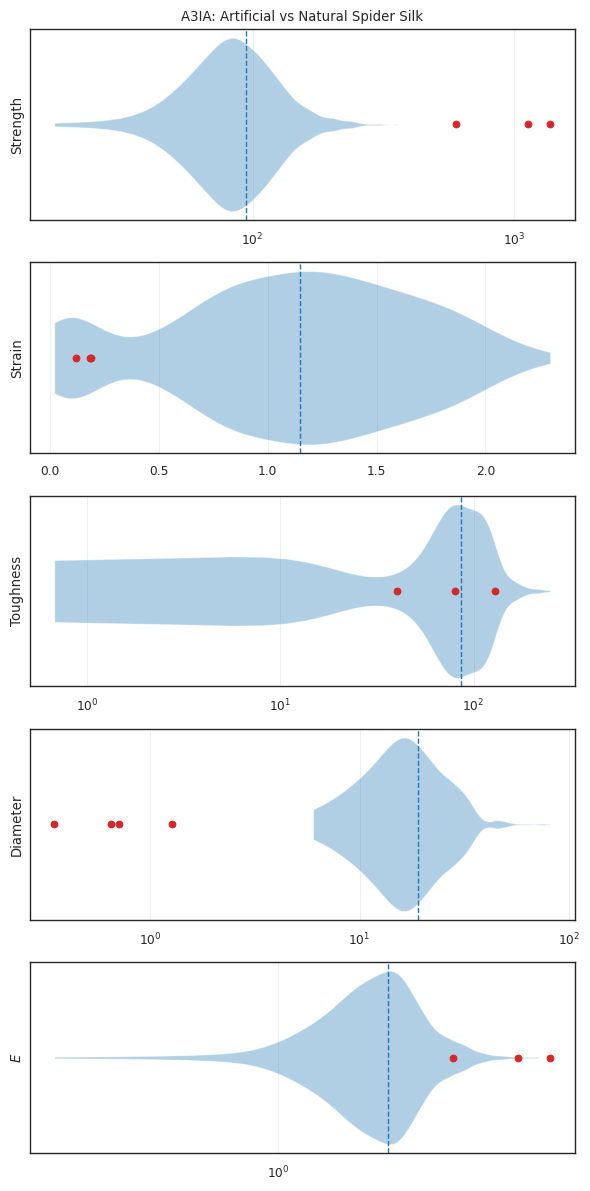

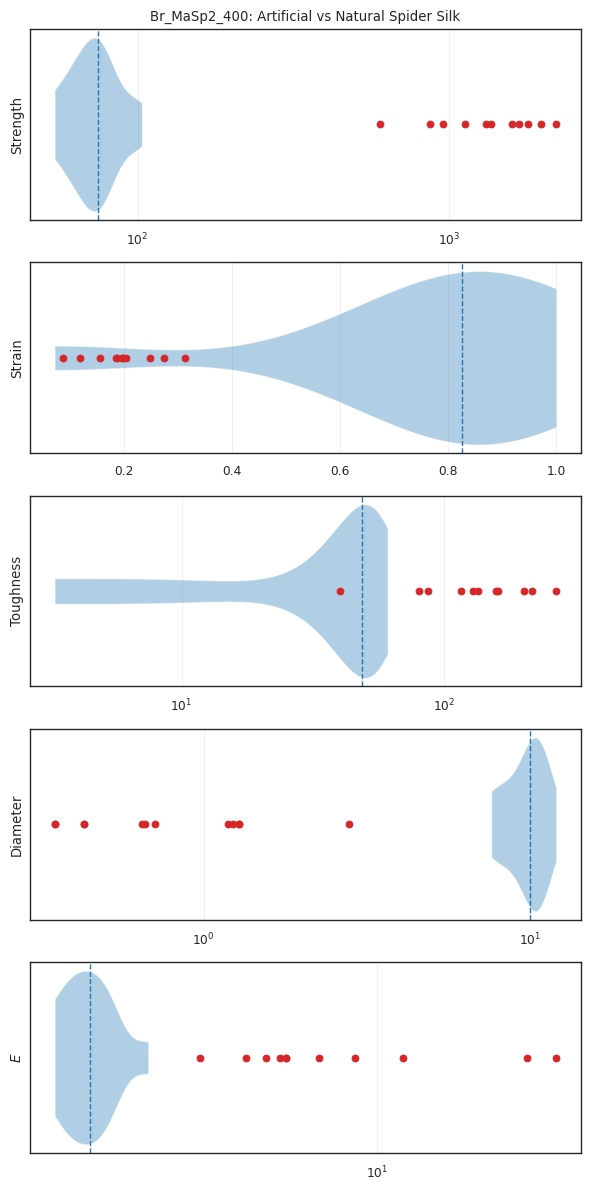

In [ ]:
def plot_protein_comparison(
    protein,
    ds_props,
    silkome_means,
    properties,
    prop_labels=None,
    log_scale_props=None,
    figsize=(6, 12)
):
    prop_labels = prop_labels or {}
    log_scale_props = log_scale_props or set()

    fig, axes = plt.subplots(
        nrows=len(properties),
        ncols=1,
        figsize=figsize,
        sharex=False
    )

    if len(properties) == 1:
        axes = [axes]

    art_sub = ds_props[ds_props["Protein"] == protein]
    nat_sub = silkome_means[silkome_means["Protein"] == protein]

    for ax, prop in zip(axes, properties):
        label = prop_labels.get(prop, prop)

        art_vals = art_sub[prop].dropna().values
        nat_vals = nat_sub[prop].dropna().values

        # ---------- Artificial silk (violin centered) ----------
        parts = ax.violinplot(
            art_vals,
            positions=[0],
            vert=False,
            widths=0.6,
            showextrema=False
        )

        for pc in parts["bodies"]:
            pc.set_facecolor("tab:blue")
            pc.set_alpha(0.35)

        # Median artificial
        ax.axvline(
            np.median(art_vals),
            color="tab:blue",
            linestyle="--",
            lw=1
        )

        # ---------- Natural silk (center reference) ----------
        ax.scatter(
            nat_vals,
            np.zeros_like(nat_vals),
            color="tab:red",
            zorder=3,
            label="Natural silk"
        )

        std_col = f"{prop}_std"
        if std_col in nat_sub.columns:
            nat_stds = nat_sub[std_col].values
            ax.errorbar(
                nat_vals,
                np.zeros_like(nat_vals),
                xerr=nat_stds,
                fmt="none",
                ecolor="tab:red",
                alpha=0.6
            )

        # ---------- Formatting ----------
        ax.set_yticks([])
        ax.set_ylabel(label)
        ax.grid(axis="x", alpha=0.3)

        if prop in log_scale_props:
            ax.set_xscale("log")

    axes[0].set_title(f"{protein}: Artificial vs Natural Spider Silk")

    fig.tight_layout()
    return fig



log_scale_props = [property_labels[0]] + property_labels[2:]
pretty_labels = dict(zip(property_labels, ['Strength', 'Strain', 'Toughness', 'Diameter', '$E$']))
fig = plot_protein_comparison('A3IA', ds_props, silkome_means, property_labels, prop_labels=pretty_labels, log_scale_props=log_scale_props)
fig = plot_protein_comparison('Br_MaSp2_400', ds_props, silkome_means, property_labels, prop_labels=pretty_labels, log_scale_props=log_scale_props)

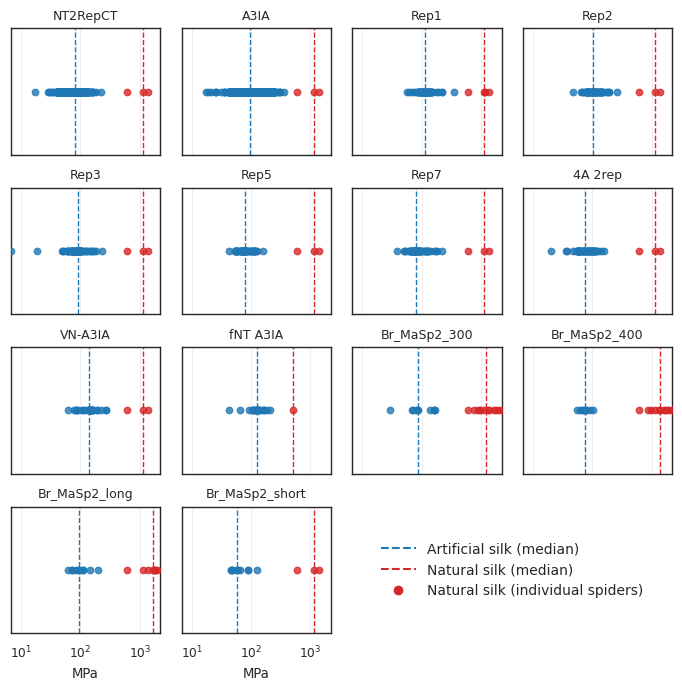

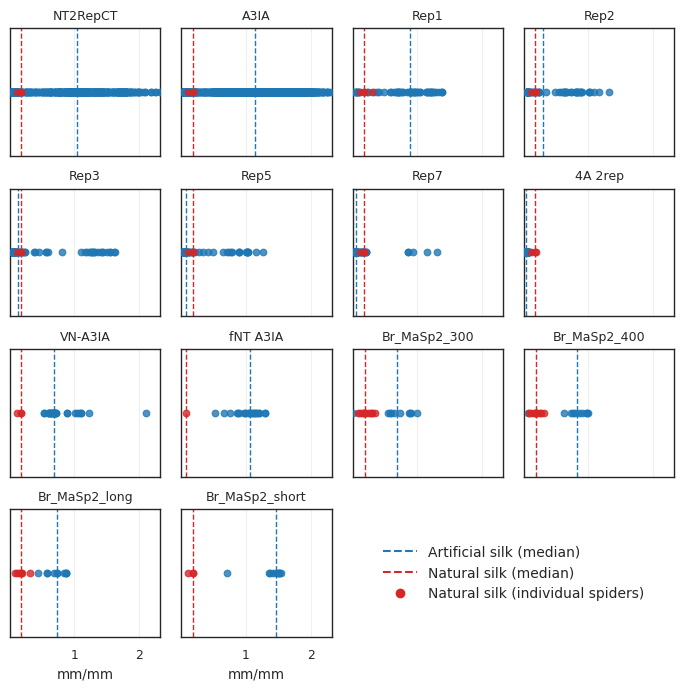

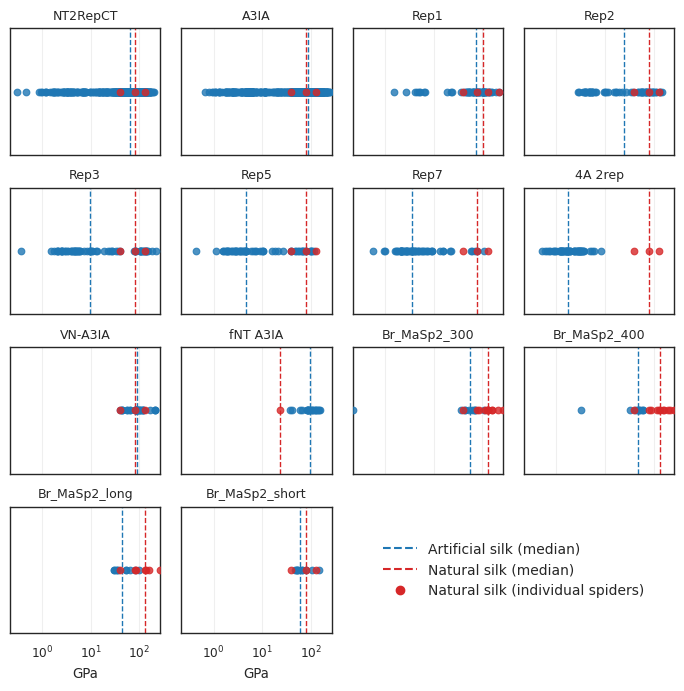

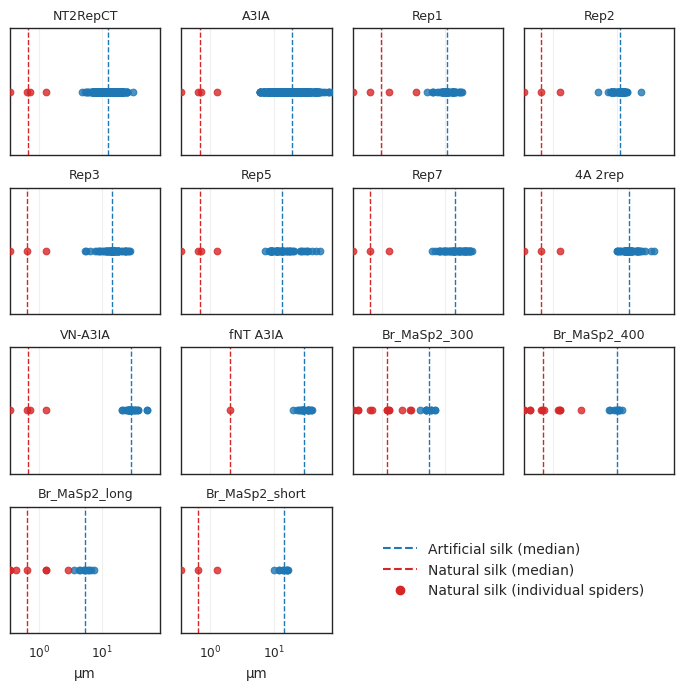

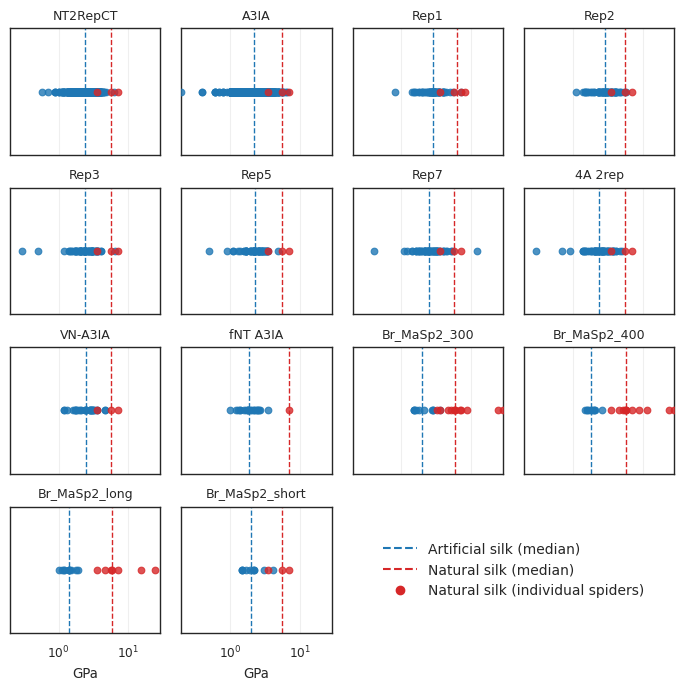

In [3]:
import matplotlib.gridspec as gridspec

def plot_protein_comparison_grid(
    property,
    ds_props,
    silkome_means,
    unit,
    log_scale_prop=False,
    figsize=(7, 7),
    silkome_sds=None,
):

    fig = plt.figure(figsize=figsize)
    gs = gridspec.GridSpec(4, 4, figure=fig)

    axes = np.empty((4, 4), dtype=object)
    for r in range(4):
        for c in range(4):
            axes[r, c] = fig.add_subplot(gs[r, c])

    axes_flat = axes.ravel()

    prop = property

    # ---------- Global x-limits ----------
    all_art = ds_props[prop].dropna().values
    all_nat = silkome_means[prop].dropna().values
        
    xmin = min(all_art.min(), all_nat.min())
    xmax = max(all_art.max(), all_nat.max())

    if log_scale_prop:
        xmin = max(xmin, 1e-6)  # avoid log(0)

    for i, ax in enumerate(axes_flat):

        if i >= len(recombinant_proteins):
            ax.axis("off")
            continue

        protein = recombinant_proteins[i]

        art_sub = ds_props[ds_props["Protein"] == protein]
        nat_sub = silkome_means[silkome_means["Protein"] == protein]

        art_vals = art_sub[prop].dropna().values
        nat_vals = nat_sub[prop].dropna().values

        # ---------- Artificial silk ----------
        if len(art_vals) < 2000:
            ax.scatter(
                art_vals,
                np.zeros_like(art_vals),
                color="tab:blue",
                zorder=3,
                alpha=0.8
            )
        else:
            vp = ax.violinplot(
                art_vals,
                positions=[0],
                vert=False,
                widths=0.6,
                showextrema=False
            )

            for body in vp["bodies"]:
                body.set_facecolor("tab:blue")
                body.set_alpha(0.35)

        ax.axvline(
            np.median(art_vals),
            color="tab:blue",
            linestyle="--",
            lw=1
        )

        # ---------- Natural silk ----------
        if len(nat_vals) < 100:
            ax.scatter(
                nat_vals,
                np.zeros_like(nat_vals),
                color="tab:red",
                zorder=3,
                alpha=0.8
            )

            if silkome_sds is not None:
                nat_sub_sd = silkome_sds[silkome_sds["Protein"] == protein]
                nat_sd = nat_sub_sd[prop].dropna().values
                ax.errorbar(
                    nat_vals,
                    np.zeros_like(nat_vals),
                    xerr=nat_sd,
                    fmt="none",
                    ecolor="tab:red",
                    alpha=0.5
                )
        else:
            vp = ax.violinplot(
                nat_vals,
                positions=[0],
                vert=False,
                widths=0.6,
                showextrema=False
            )

            for body in vp["bodies"]:
                body.set_facecolor("tab:red")
                body.set_alpha(0.35)

        # Natural median reference
        ax.axvline(
            np.median(nat_vals),
            color="tab:red",
            linestyle="--",
            lw=1
        )

        # ---------- Formatting ----------
        ax.set_xlim(xmin, xmax)
        ax.set_yticks([])
        ax.grid(axis="x", alpha=0.3)
        ax.set_title(protein, fontsize=9)

        if log_scale_prop:
            ax.set_xscale("log")

        row, col = divmod(i, 4)

        if row == 3:
            ax.set_xlabel(unit)
        else:
            ax.set_xticklabels([])

    # ---------- Legend axis spanning last two cells ----------
    legend_ax = fig.add_subplot(gs[3, 2:4])  # row 3, columns 2–3
    legend_ax.axis("off")

    # ---------- Figure-level legend ----------
    from matplotlib.lines import Line2D

    legend_elements = [
        Line2D([0], [0], color="tab:blue", lw=1.5, linestyle="--",
            label="Artificial silk (median)"),
        Line2D([0], [0], color="tab:red", lw=1.5, linestyle="--",
            label="Natural silk (median)"),
        Line2D([0], [0], marker="o", color="tab:red", lw=0,
            markersize=6,
            label="Natural silk (individual spiders)")
    ]

    legend_ax.legend(
        handles=legend_elements,
        loc="center",
        frameon=False,
        fontsize=10,
        handlelength=2.5,
        ncol=1   # or 2 if you want it more compact
    )

    # ---------- Title ----------
    #title = prop_label if prop_label is not None else property
    #fig.suptitle(
    #    f"Artificial vs Natural Spider Silk – {title}",
    #    fontsize=14
    #)

    #fig.tight_layout(rect=(0, 0, 0.97, 0.93))
    fig.tight_layout()

    return fig


units = ['MPa', 'mm/mm', 'GPa', 'μm', 'GPa']
for i in range(5):
    fig = plot_protein_comparison_grid(property_labels[i], ds_props, silkome_means, units[i], log_scale_prop=i!=1, figsize=(7,7))

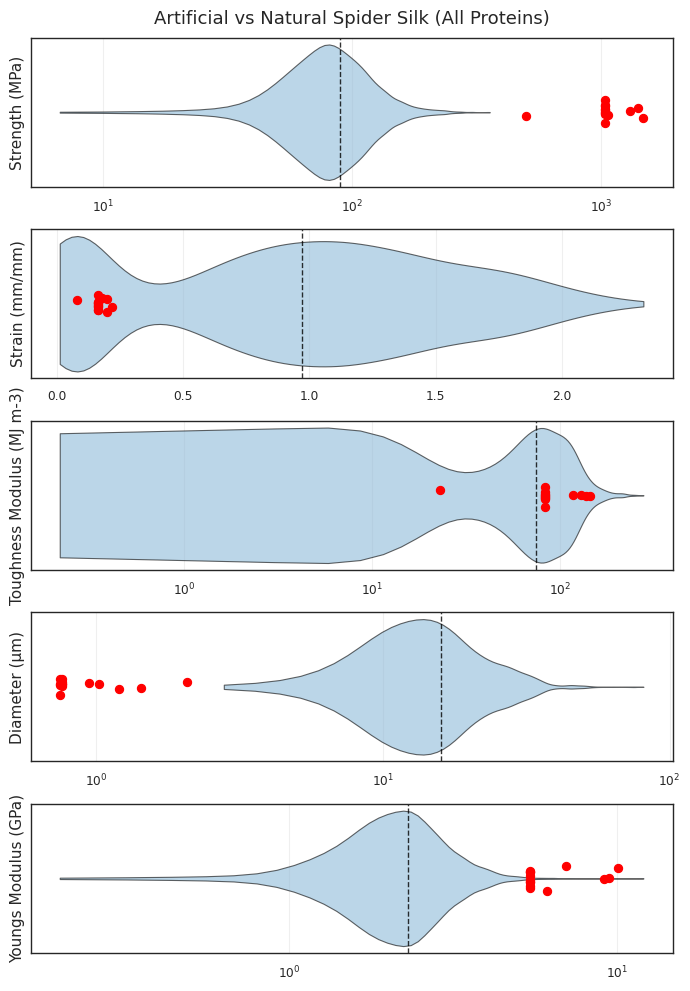

In [ ]:
def plot_pooled_artificial_vs_natural(
    ds_props,
    silkome_means,
    properties=None,
    log_scale_props=None,
    figsize=(7, 10),
):
    """
    Parameters
    ----------
    ds_props : pd.DataFrame
        Columns: ['protein', <mechanical properties>]
        Individual artificial silk measurements

    silkome_means : pd.DataFrame
        Columns: ['protein', 'idv_id', <mechanical properties>]
        One or multiple natural silk entries per protein

    properties : list of str, optional
        Mechanical properties to plot. If None, inferred automatically.

    log_scale_props : list of str, optional
        Properties to be plotted on log scale.

    figsize : tuple
        Figure size
    """

    if properties is None:
        properties = [
            c for c in ds_props.columns if c != "Protein"
        ]

    if log_scale_props is None:
        log_scale_props = []

    n_props = len(properties)
    fig, axes = plt.subplots(
        n_props, 1, figsize=figsize, sharex=False
    )

    if n_props == 1:
        axes = [axes]

    for ax, prop in zip(axes, properties):

        # --- Artificial data (pooled) ---
        artificial_vals = ds_props[prop].dropna().values

        # --- Natural data (one value per protein) ---
        natural_vals = (
            silkome_means
            .groupby("Protein")[prop]
            .mean()
            .dropna()
            .values
        )

        # --- Violin: artificial ---
        parts = ax.violinplot(
            artificial_vals,
            vert=False,
            widths=0.8,
            showextrema=False,
        )

        for pc in parts["bodies"]:
            pc.set_facecolor("#8FBBD9")
            pc.set_edgecolor("black")
            pc.set_alpha(0.6)

        # --- Median of artificial ---
        median_val = np.median(artificial_vals)
        ax.axvline(
            median_val,
            linestyle="--",
            color="black",
            linewidth=1,
            alpha=0.8,
        )

        # --- Natural points (centered) ---
        y_center = np.ones_like(natural_vals)
        jitter = np.random.normal(0, 0.03, size=len(natural_vals))

        ax.scatter(
            natural_vals,
            y_center + jitter,
            color="red",
            s=35,
            zorder=3,
            label="Natural silk",
        )

        # --- Formatting ---
        ax.set_yticks([])
        ax.set_ylabel(prop, fontsize=11)

        if prop in log_scale_props:
            ax.set_xscale("log")

        ax.grid(True, axis="x", alpha=0.3)

    axes[0].set_title(
        "Artificial vs Natural Spider Silk (All Proteins)",
        fontsize=13,
        pad=10,
    )

    plt.tight_layout()
    plt.show()

log_scale_props = [property_labels[0]] + property_labels[2:]
pretty_labels = dict(zip(property_labels, ['Strength', 'Strain', 'Toughness', 'Diameter', '$E$']))
fig = plot_pooled_artificial_vs_natural(ds_props, silkome_means, property_labels, log_scale_props=log_scale_props)